<a href="https://colab.research.google.com/github/muhammadfaraz6640/deep-learning-with-tensorflow2.0/blob/master/FashionMNISTdataset_deeplearning3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
import io
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [0]:
#loading data from Keras
data = keras.datasets.fashion_mnist
(train_img , train_lab ) , (test_img , test_lab) = data.load_data() 

In [0]:
train_img.shape   # where 28 by 28  is the dimension of image and 6000 is the total images

(60000, 28, 28)

In [0]:
train_lab.shape  #6000 train images thats why 6000 train labels

(60000,)

In [0]:
test_img.shape    # where 28 by 28  is the dimension of test images and 1000 is the total test images

(10000, 28, 28)

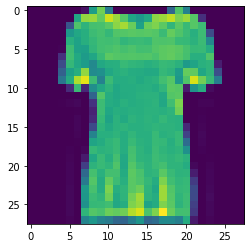

In [0]:
# checking the images
plt.figure()
plt.imshow(train_img[10])
plt.show()

In [0]:
train_img[0]  # we have to normalize the data and scale then to 0 and 1 range

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [0]:
train_img = train_img / 255.0   #float
test_img = test_img / 255.0

In [0]:
train_img[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

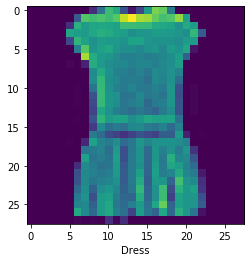

In [0]:
plt.figure()
plt.imshow(train_img[3])
plt.xlabel(classes[train_lab[3]])
plt.show()

In [0]:
# building a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   #flatten convert 28 by 28 array to the 1d array of 784
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")                                        
])

In [0]:
#compilation of model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #use this loss function when more than one labels and you are not using one-hot encoding
              metrics=['accuracy'])

In [0]:
model.fit(train_img,train_lab,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/sample - loss: 1.7161 - acc: 0.7478
Epoch 2/10
60000/60000 [==============================] - 7s 121us/sample - loss: 1.6282 - acc: 0.8327
Epoch 3/10
60000/60000 [==============================] - 7s 119us/sample - loss: 1.6128 - acc: 0.8485
Epoch 4/10
60000/60000 [==============================] - 7s 118us/sample - loss: 1.6038 - acc: 0.8569
Epoch 5/10
60000/60000 [==============================] - 7s 122us/sample - loss: 1.5980 - acc: 0.8631
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 1.5947 - acc: 0.8660
Epoch 7/10
60000/60000 [==============================] - 7s 119us/sample - loss: 1.5907 - acc: 0.8703
Epoch 8/10
60000/60000 [==============================] - 7s 120us/sample - loss: 1.5869 - acc: 0.8740
Epoch 9/10
60000/60000 [==============================] - 7s 118us/sample - loss: 1.5850 - acc: 0.8762
Epoch 10/10
60000/60000 [=========================